In [20]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [22]:
#Load the predfined dataset

boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
boston_dataset.feature_names
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [26]:
#Load the data and divde them into X and Y

boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names

boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

In [27]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
#input

x = boston_pd.iloc[:,:-1]

#output

y = boston_pd.iloc[:,-1]

In [30]:
# Dividing the dataset into train and test

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)

In [31]:
(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((379, 13), (127, 13), (379,), (127,))

In [32]:
# Apply multiple linear regression model

lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [33]:
#generate prediction on Test Set
lreg_y_pred = lreg.predict(x_test)

In [34]:
#Calculate the Mean Squared Error

mean_squared_error = np.mean((lreg_y_pred-y_test)**2)

print("Mean Squared Error for Linear Regression is ", mean_squared_error)

Mean Squared Error for Linear Regression is  26.95142562423582


In [35]:
# putting together  the coefficient and their corresponding variable names 

lreg_coefficient = pd.DataFrame()
lreg_coefficient['Columns'] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)

print(lreg_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.118902
1        ZN              0.050569
2     INDUS             -0.010743
3      CHAS              3.661849
4       NOX            -15.295733
5        RM              3.393162
6       AGE             -0.005912
7       DIS             -1.492344
8       RAD              0.333696
9       TAX             -0.015059
10  PTRATIO             -0.869475
11        B              0.008806
12    LSTAT             -0.492763


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

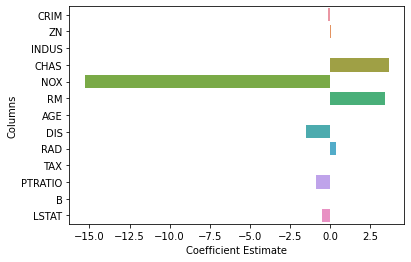

In [38]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate',y='Columns',data=lreg_coefficient)

In [39]:
# Check with Ridge

from sklearn.linear_model import Ridge


In [40]:
# Train the model 

ridgeR = Ridge(alpha =0.1)
ridgeR.fit(x_train,y_train)
y_pred = ridgeR.predict(x_test)

In [41]:
# Calculting the Mean Squared Error for Ridge 

mean_squared_error_ridge = np.mean((y_pred-y_test)**2)
print("Mean sqaured error for Ridge Regression is ",mean_squared_error_ridge)

Mean sqaured error for Ridge Regression is  27.021143024914817


In [43]:
ridge_coefficient = pd.DataFrame()
ridge_coefficient['Columns'] = x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)

print(ridge_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.118340
1        ZN              0.050664
2     INDUS             -0.016279
3      CHAS              3.622296
4       NOX            -14.107073
5        RM              3.397932
6       AGE             -0.006980
7       DIS             -1.475193
8       RAD              0.331178
9       TAX             -0.015143
10  PTRATIO             -0.857380
11        B              0.008860
12    LSTAT             -0.494360


In [44]:
# Check with Lasso 

from sklearn.linear_model import Lasso


In [45]:
# Train the model

lassoR = Lasso(alpha =0.1)
lassoR.fit(x_train,y_train)
y_pred = lassoR.predict(x_test)

In [46]:
# Calculate the mean squared error with Lasso

mean_squared_error_lasso = np.mean((y_pred-y_test)**2)
print("Mean sqaured error for Lasso Regression is ",mean_squared_error_lasso)

Mean sqaured error for Lasso Regression is  28.424573542223296


In [47]:
lasso_coefficient = pd.DataFrame()
lasso_coefficient['Columns'] = x_train.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lassoR.coef_)

print(lasso_coefficient)


    Columns  Coefficient Estimate
0      CRIM             -0.110870
1        ZN              0.051777
2     INDUS             -0.066433
3      CHAS              1.476784
4       NOX             -0.000000
5        RM              3.255138
6       AGE             -0.014520
7       DIS             -1.213800
8       RAD              0.312164
9       TAX             -0.016815
10  PTRATIO             -0.721543
11        B              0.009561
12    LSTAT             -0.536189


In [48]:
# check with elastic Net 

from sklearn.linear_model import ElasticNet

In [50]:

#Train the model 
e_net = ElasticNet(alpha = .01, l1_ratio=0.3)
e_net.fit(x_train,y_train)
y_pred = e_net.predict(x_test)

In [51]:
# Calculate the mean squared error with Lasso

mean_squared_error_e_net = np.mean((y_pred-y_test)**2)
print("Mean sqaured error for Elastic Net Regression is ",mean_squared_error_e_net)

Mean sqaured error for Elastic Net Regression is  27.860131296081555


In [52]:
e_net_coefficient = pd.DataFrame()
e_net_coefficient['Columns'] = x_train.columns
e_net_coefficient['Coefficient Estimate'] = pd.Series(e_net.coef_)

print(e_net_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.114201
1        ZN              0.051656
2     INDUS             -0.060207
3      CHAS              3.005555
4       NOX             -4.398617
5        RM              3.382665
6       AGE             -0.014888
7       DIS             -1.332536
8       RAD              0.314173
9       TAX             -0.015979
10  PTRATIO             -0.762946
11        B              0.009314
12    LSTAT             -0.512547
